In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import matplotlib.style as style

In [163]:
House_Prices_Df = pd.read_csv(r'/Volumes/HARDRIVE/intro_to_ds/House_Prices.csv')
House_Prices_Df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
House_Prices_Df.shape

(21613, 21)

In [4]:
House_Prices_Df.size

453873

In [84]:
House_Prices_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

Looking at the info we might have to convert the date's datatype to a date if it is required for analysis, and understand the variation during different times. 

In [71]:
House_Prices_Df['date'] = pd.to_datetime(House_Prices_Df['date'], format="%Y/%m/%d")

In [8]:
House_Prices_Df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

isna().sum() return the total number of missing values in each column of the dataframe. In this case, it is zero. 

In [72]:
House_Prices_Df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The average house price is 540k, but the highest house price is 7.7 million, which can potentially skew the average towards it. 

In [69]:
#removing the id column for analysis. 
sales = House_Prices_Df.drop('id', axis=1)

In [73]:
sales.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

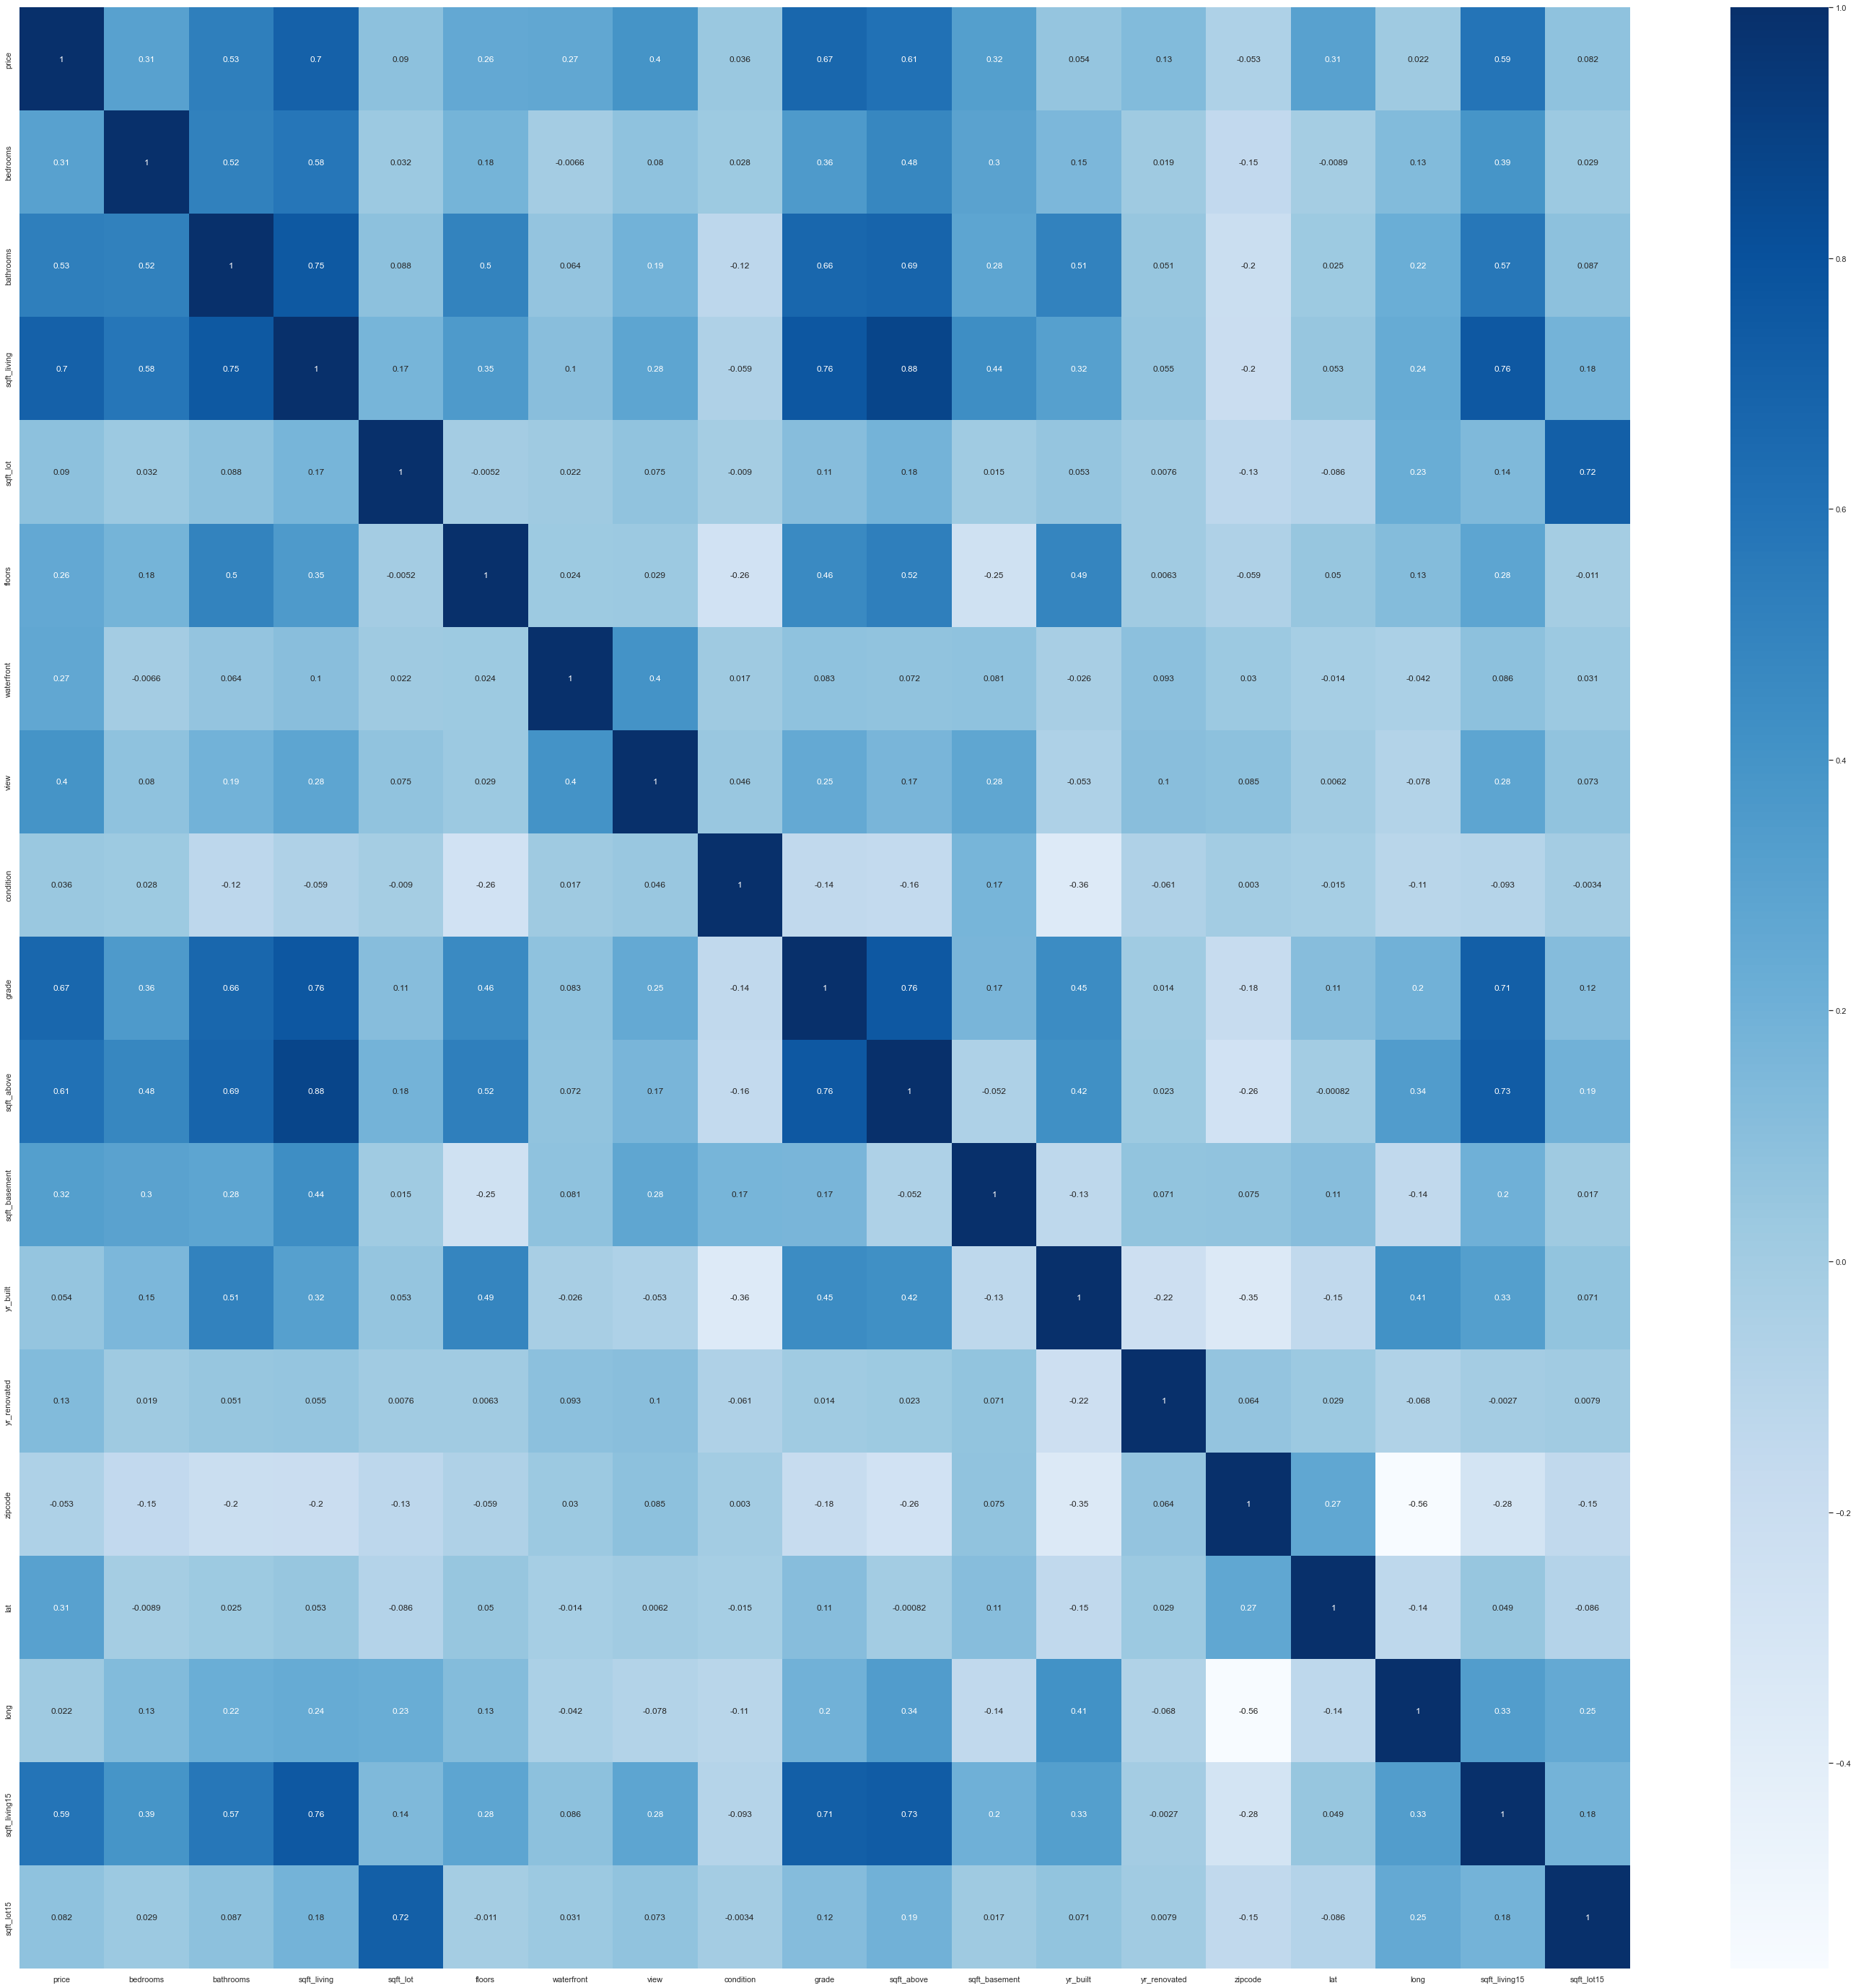

In [111]:
sales.corr()

plt.figure(figsize=(50,50))
sns.heatmap(sales.corr(),cbar=True,annot=True,cmap='Blues')


From the above heat map we can understand the key variables that are directly correlted with price, which are bedrooms, bathrooms, sqft_living, grade, sqft_above, waterfront and sqft_living15

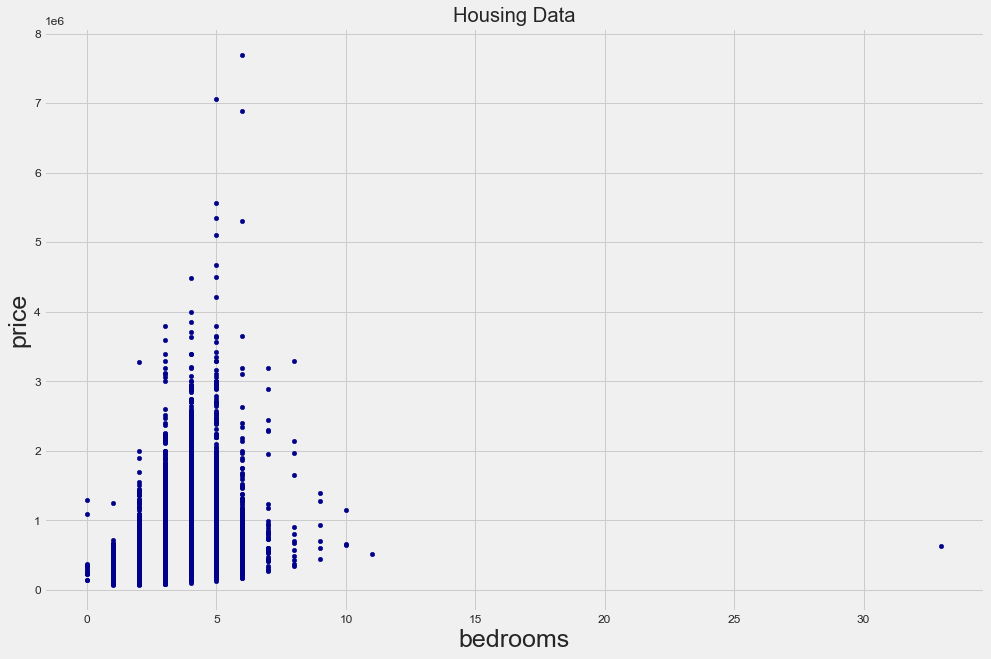

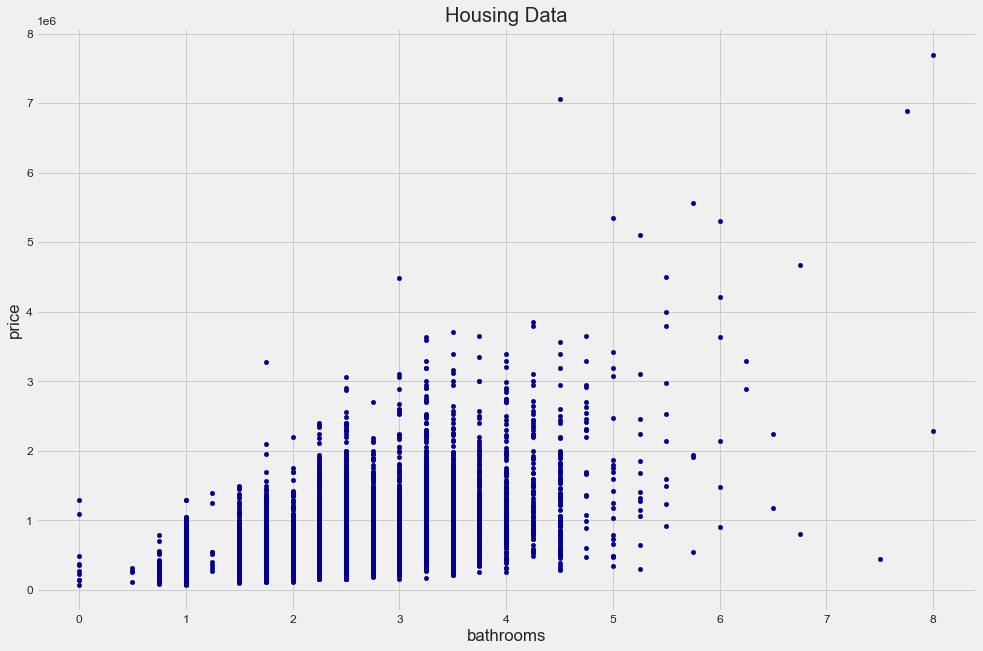

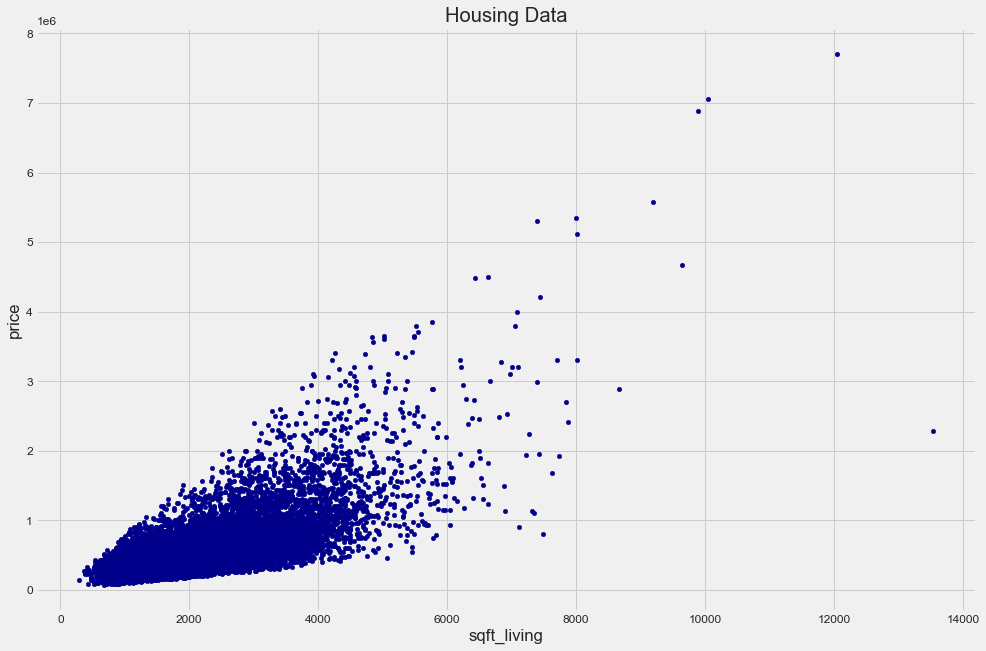

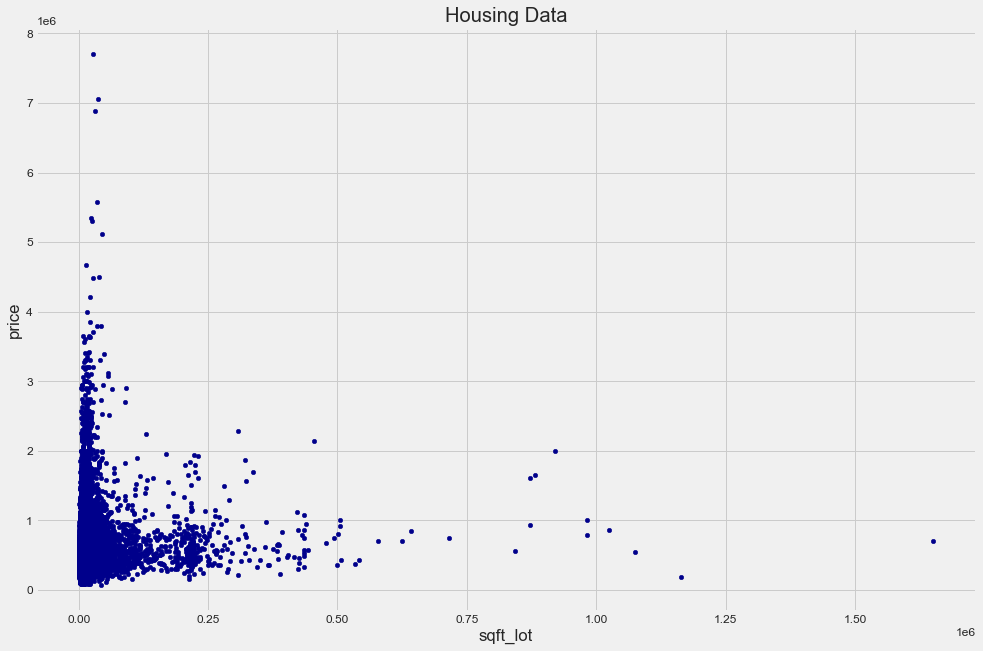

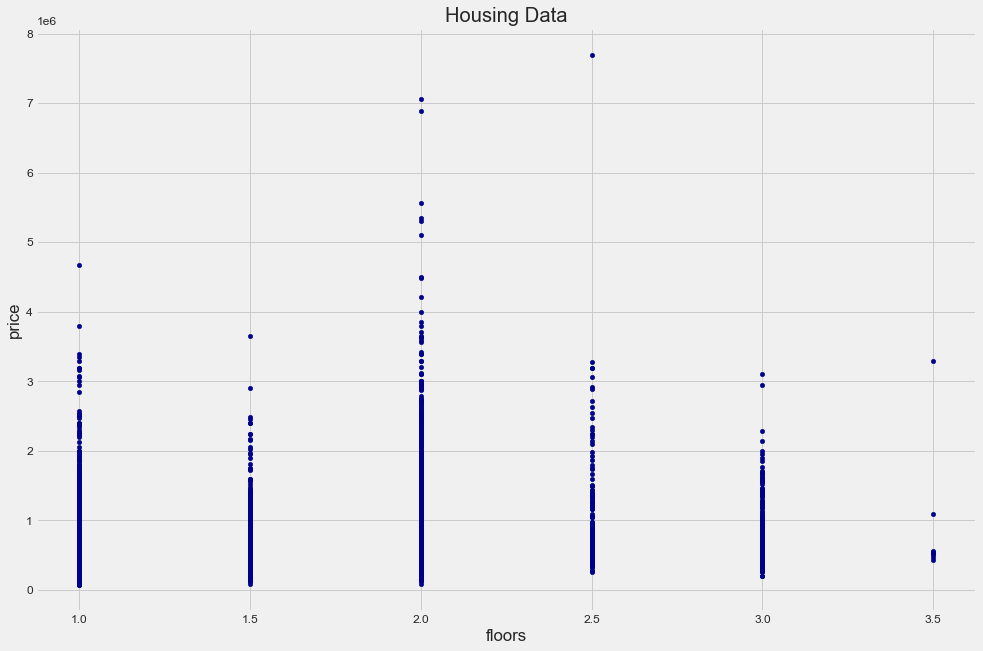

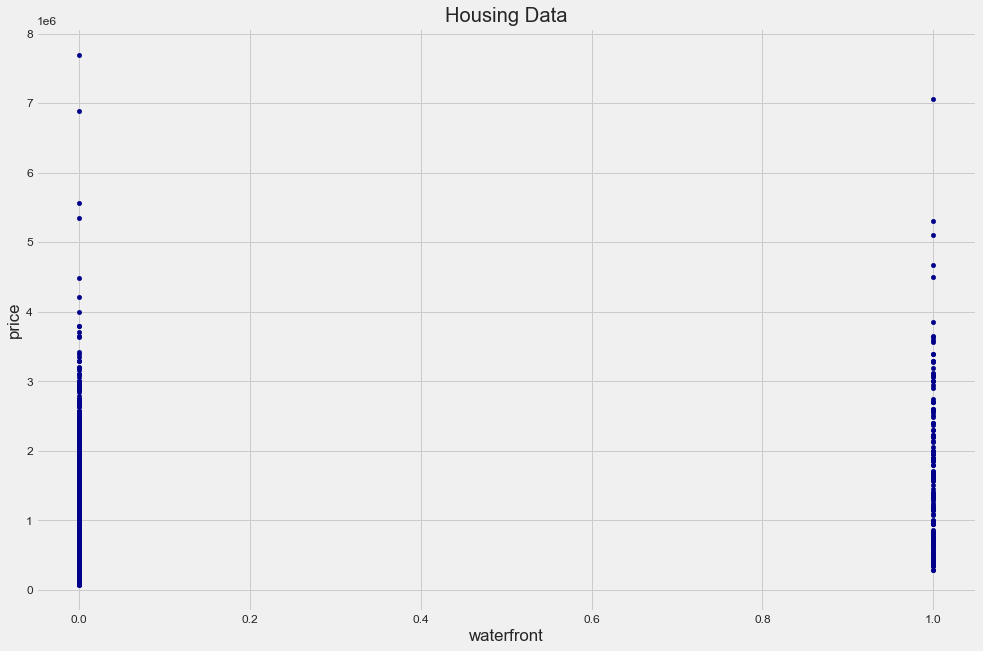

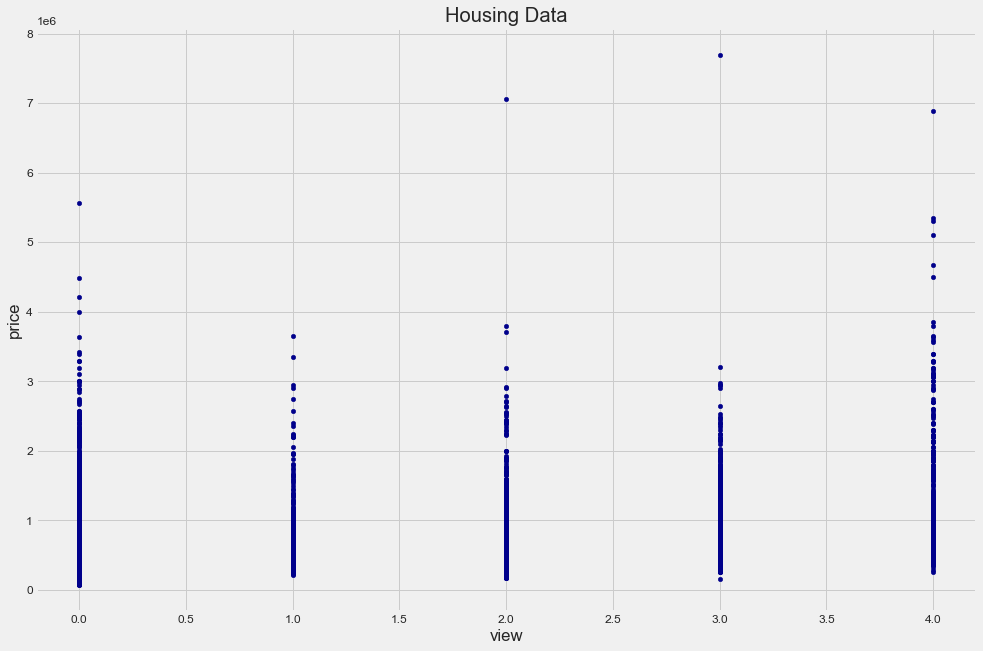

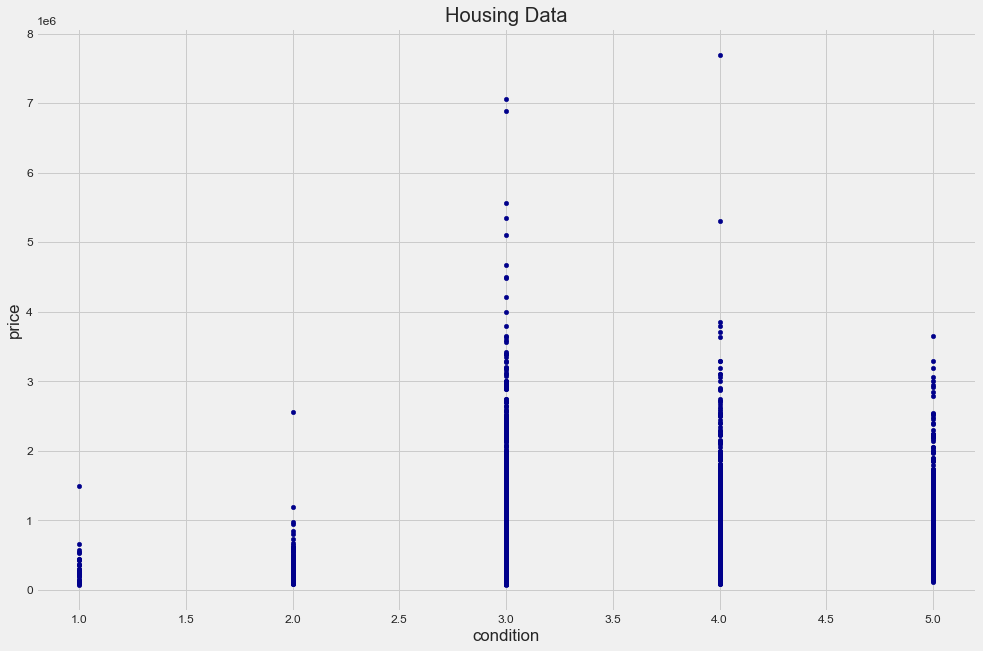

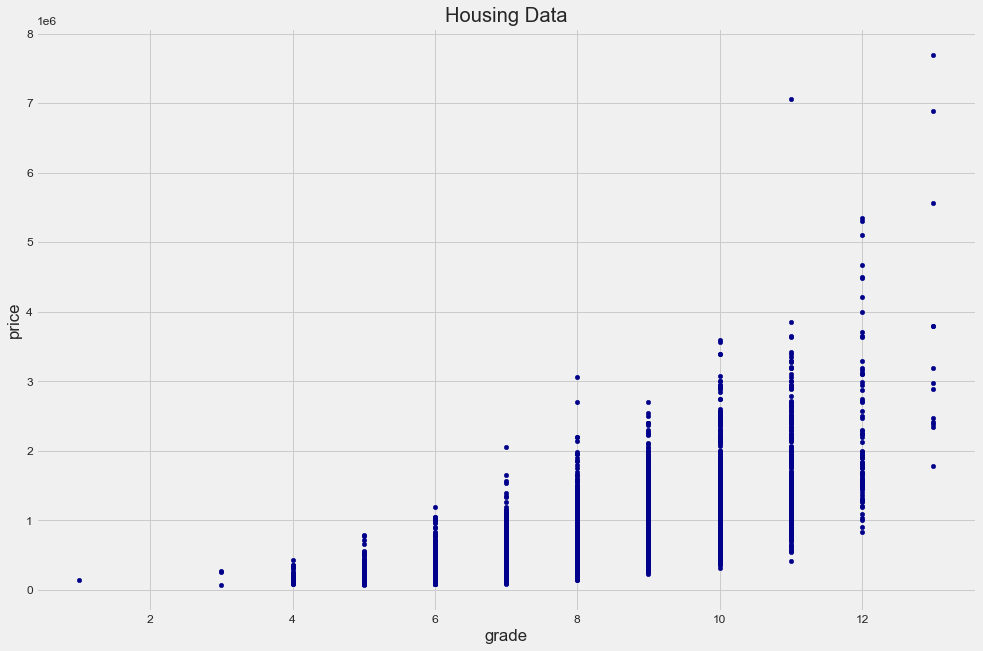

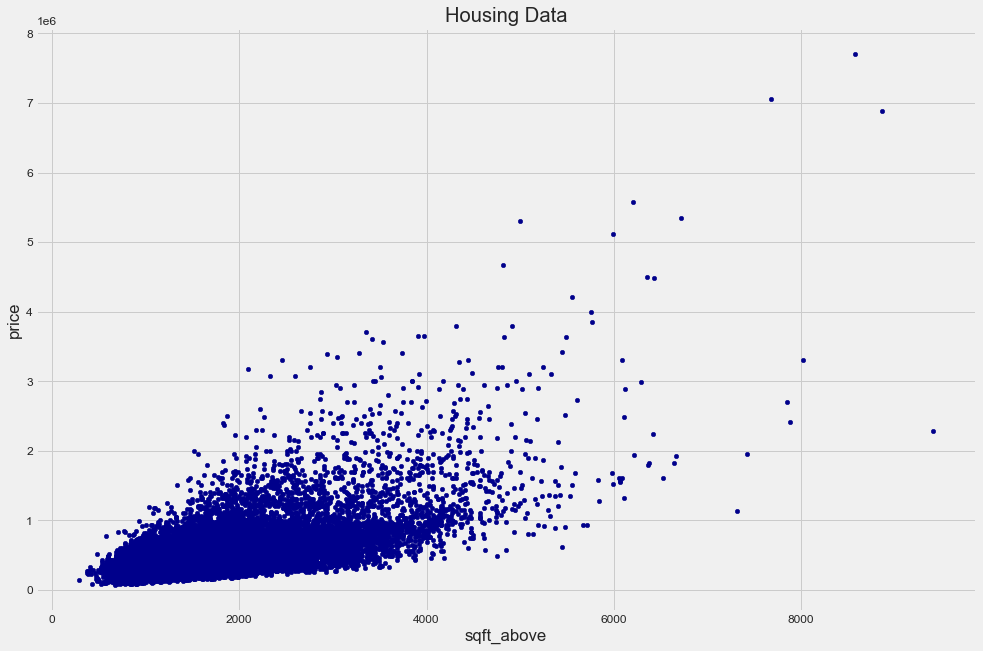

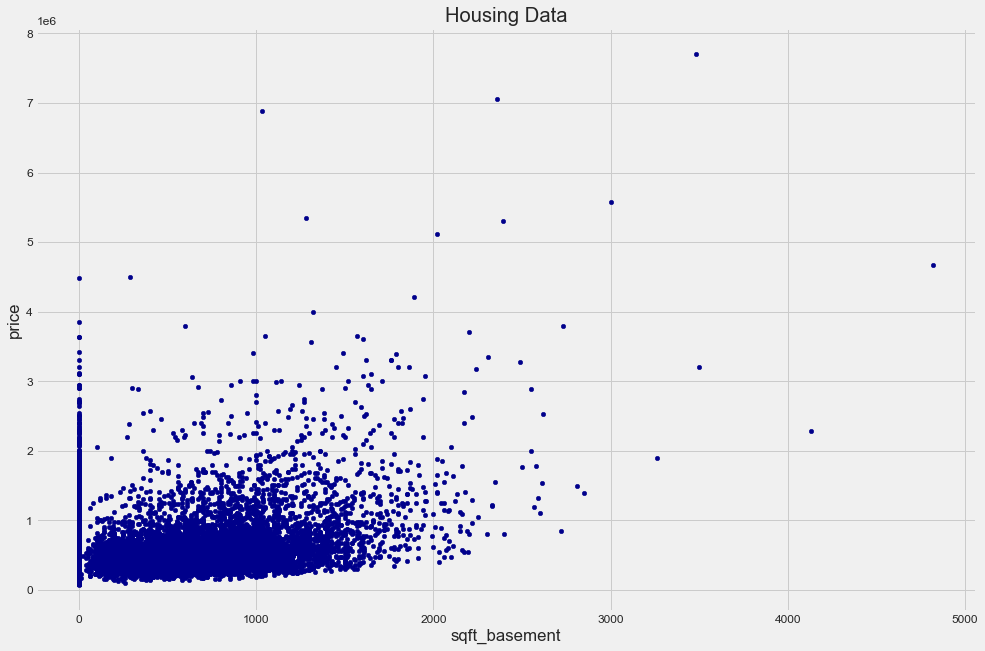

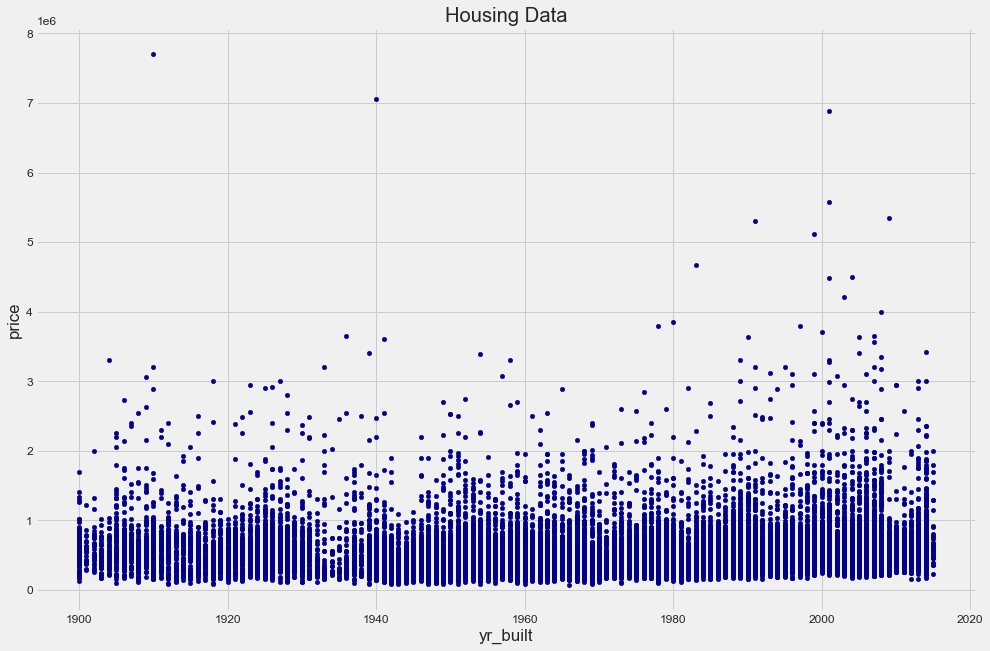

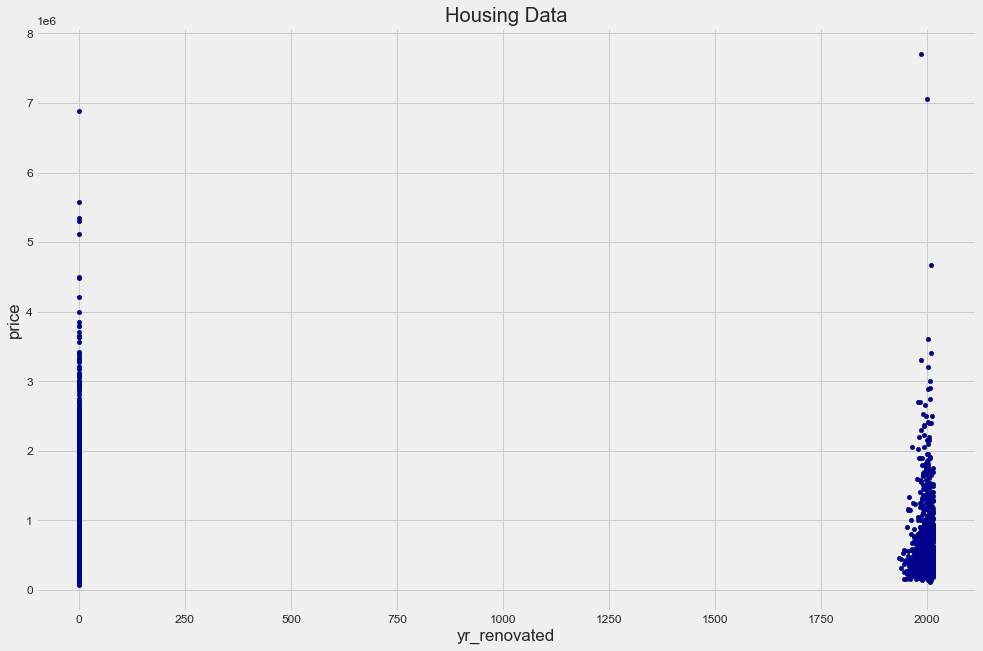

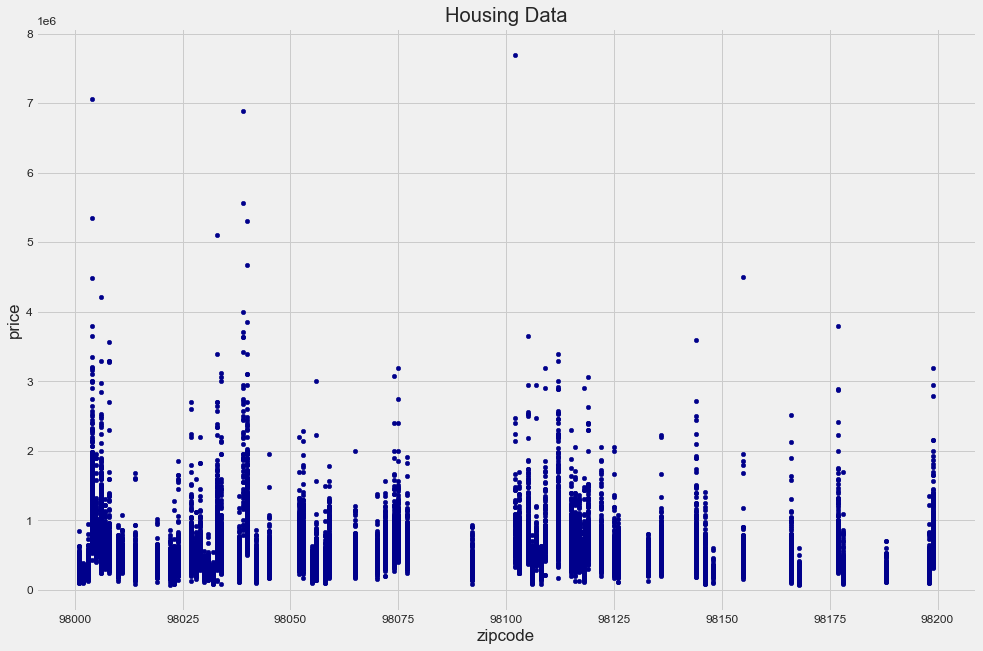

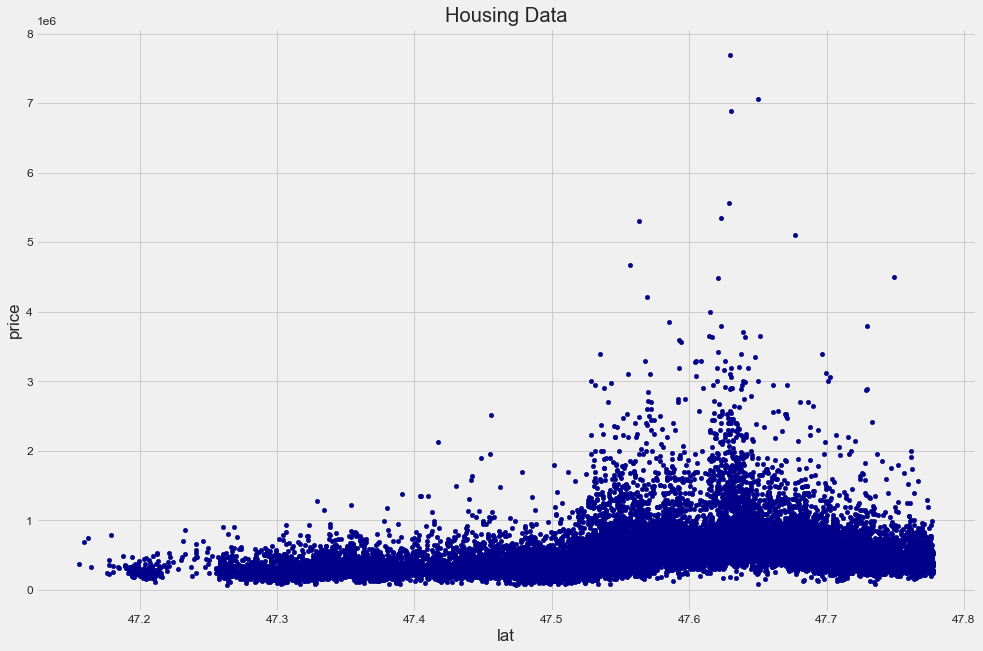

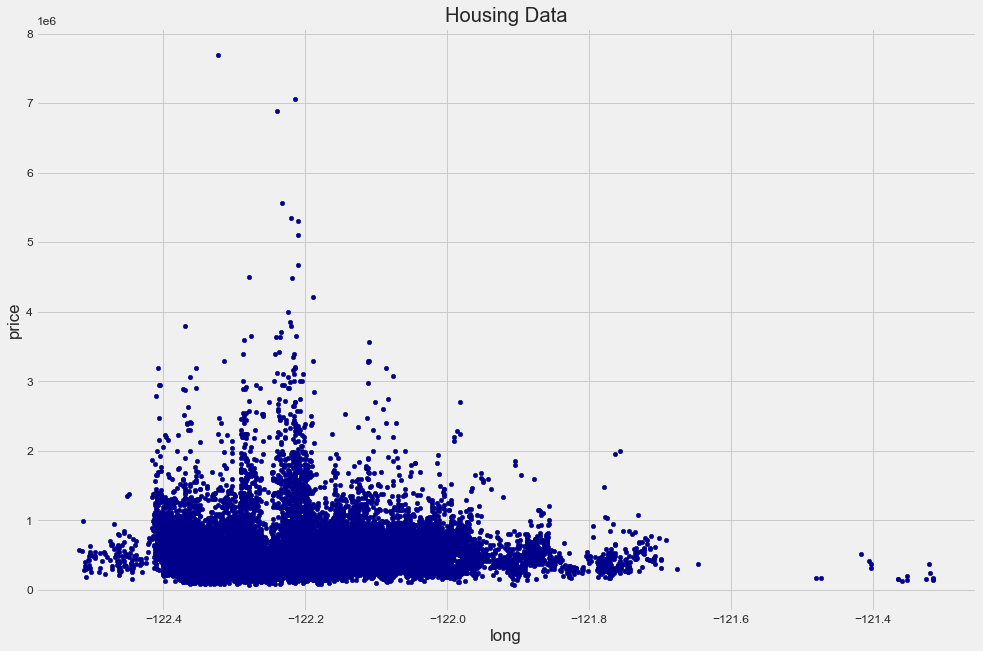

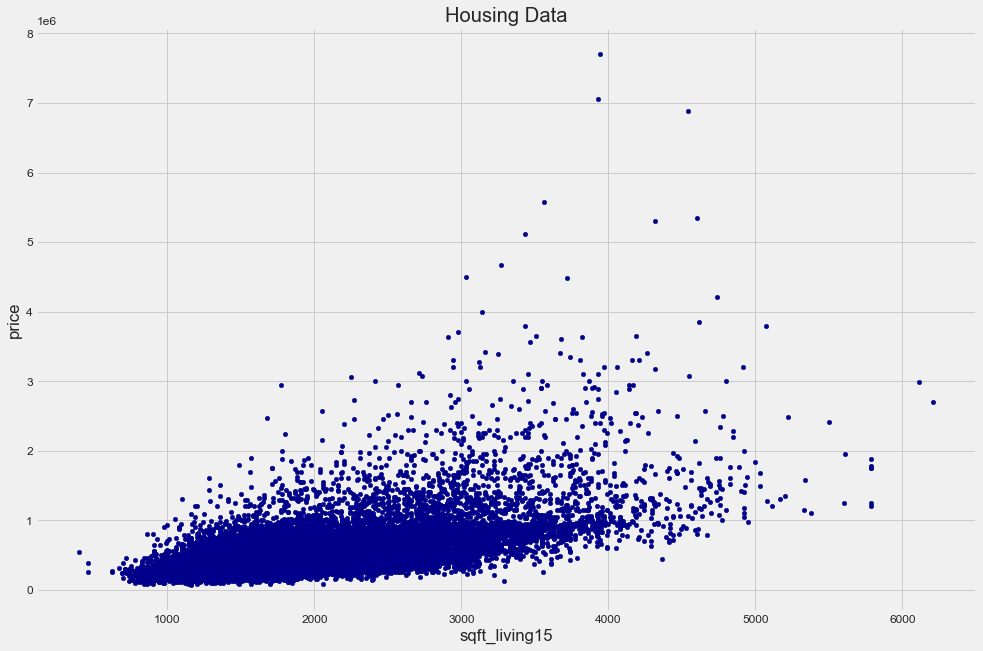

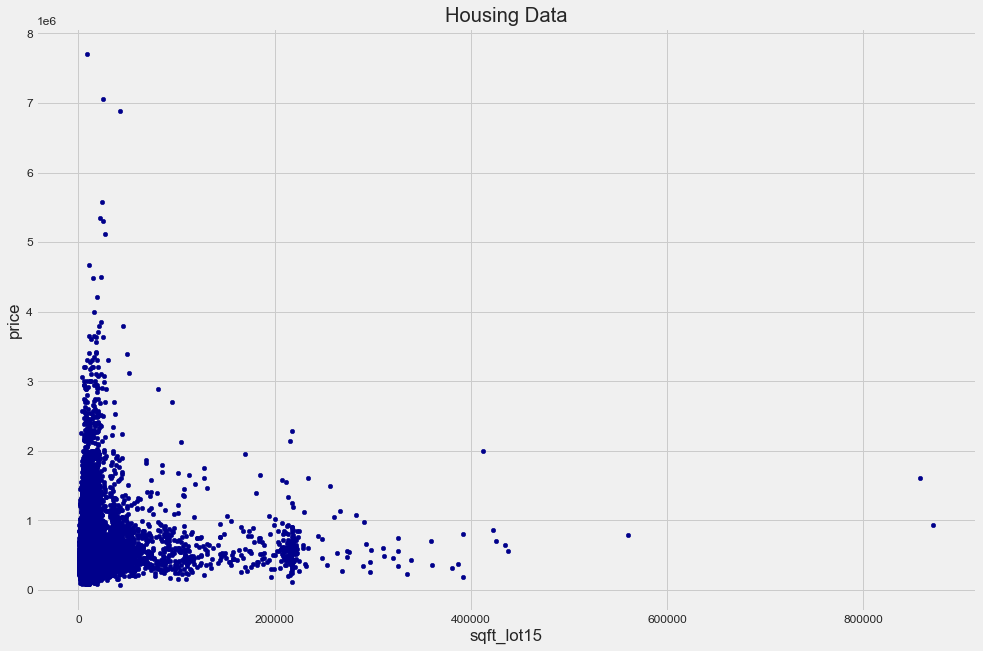

In [126]:
col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'] 

#displaying a scatterplot of all columns v/s price as the y axis. 
for ax in col:
       g = sales.plot.scatter(x=ax, y='price', c='Darkblue', figsize=(15, 10))
       style.use('fivethirtyeight')
       g.set_title("Housing Data")
       
       

From this scatterplot, we are able to look at some of the outliers in the dataset. 

Here we can see an outlier in the sqft_living v/s price graph. It has the highest sqft_living and still a lower price compared to other houses. We can try to find the value of that outlier house and then investigate all the data entries for that particular house to understand why it has a lower price compared to other ones. 

In [51]:
House_Prices_Df.sqft_living.max()
House_Prices_Df.loc[House_Prices_Df['sqft_living'] > 13500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


The house is a very good condition because of grade 12 and has a great view. The notable factors that could contribute in a lower value of the house could be because of presence of smaller houses around, less valuable houses around, which according to the correlation analysis does indicate that presence of higher value houses will cause a rise in the price of the house and vice versa. 

Another outlier in scatterplot was the graph with bedrooms v/s prices, where the outlier has 33 bedrooms, but has a price of $640K. Using loc, I will get the data of that particular house.

In [55]:
House_Prices_Df.bedrooms.max()
House_Prices_Df.loc[House_Prices_Df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


The above house has <2 bathrooms and only 1 floor, with average level of construction. This outlier could be a great investing opportunity if it is renovated and also considering the key variables that directly correlate with a higher sale price. 

**Plotting Date v/s Prices**

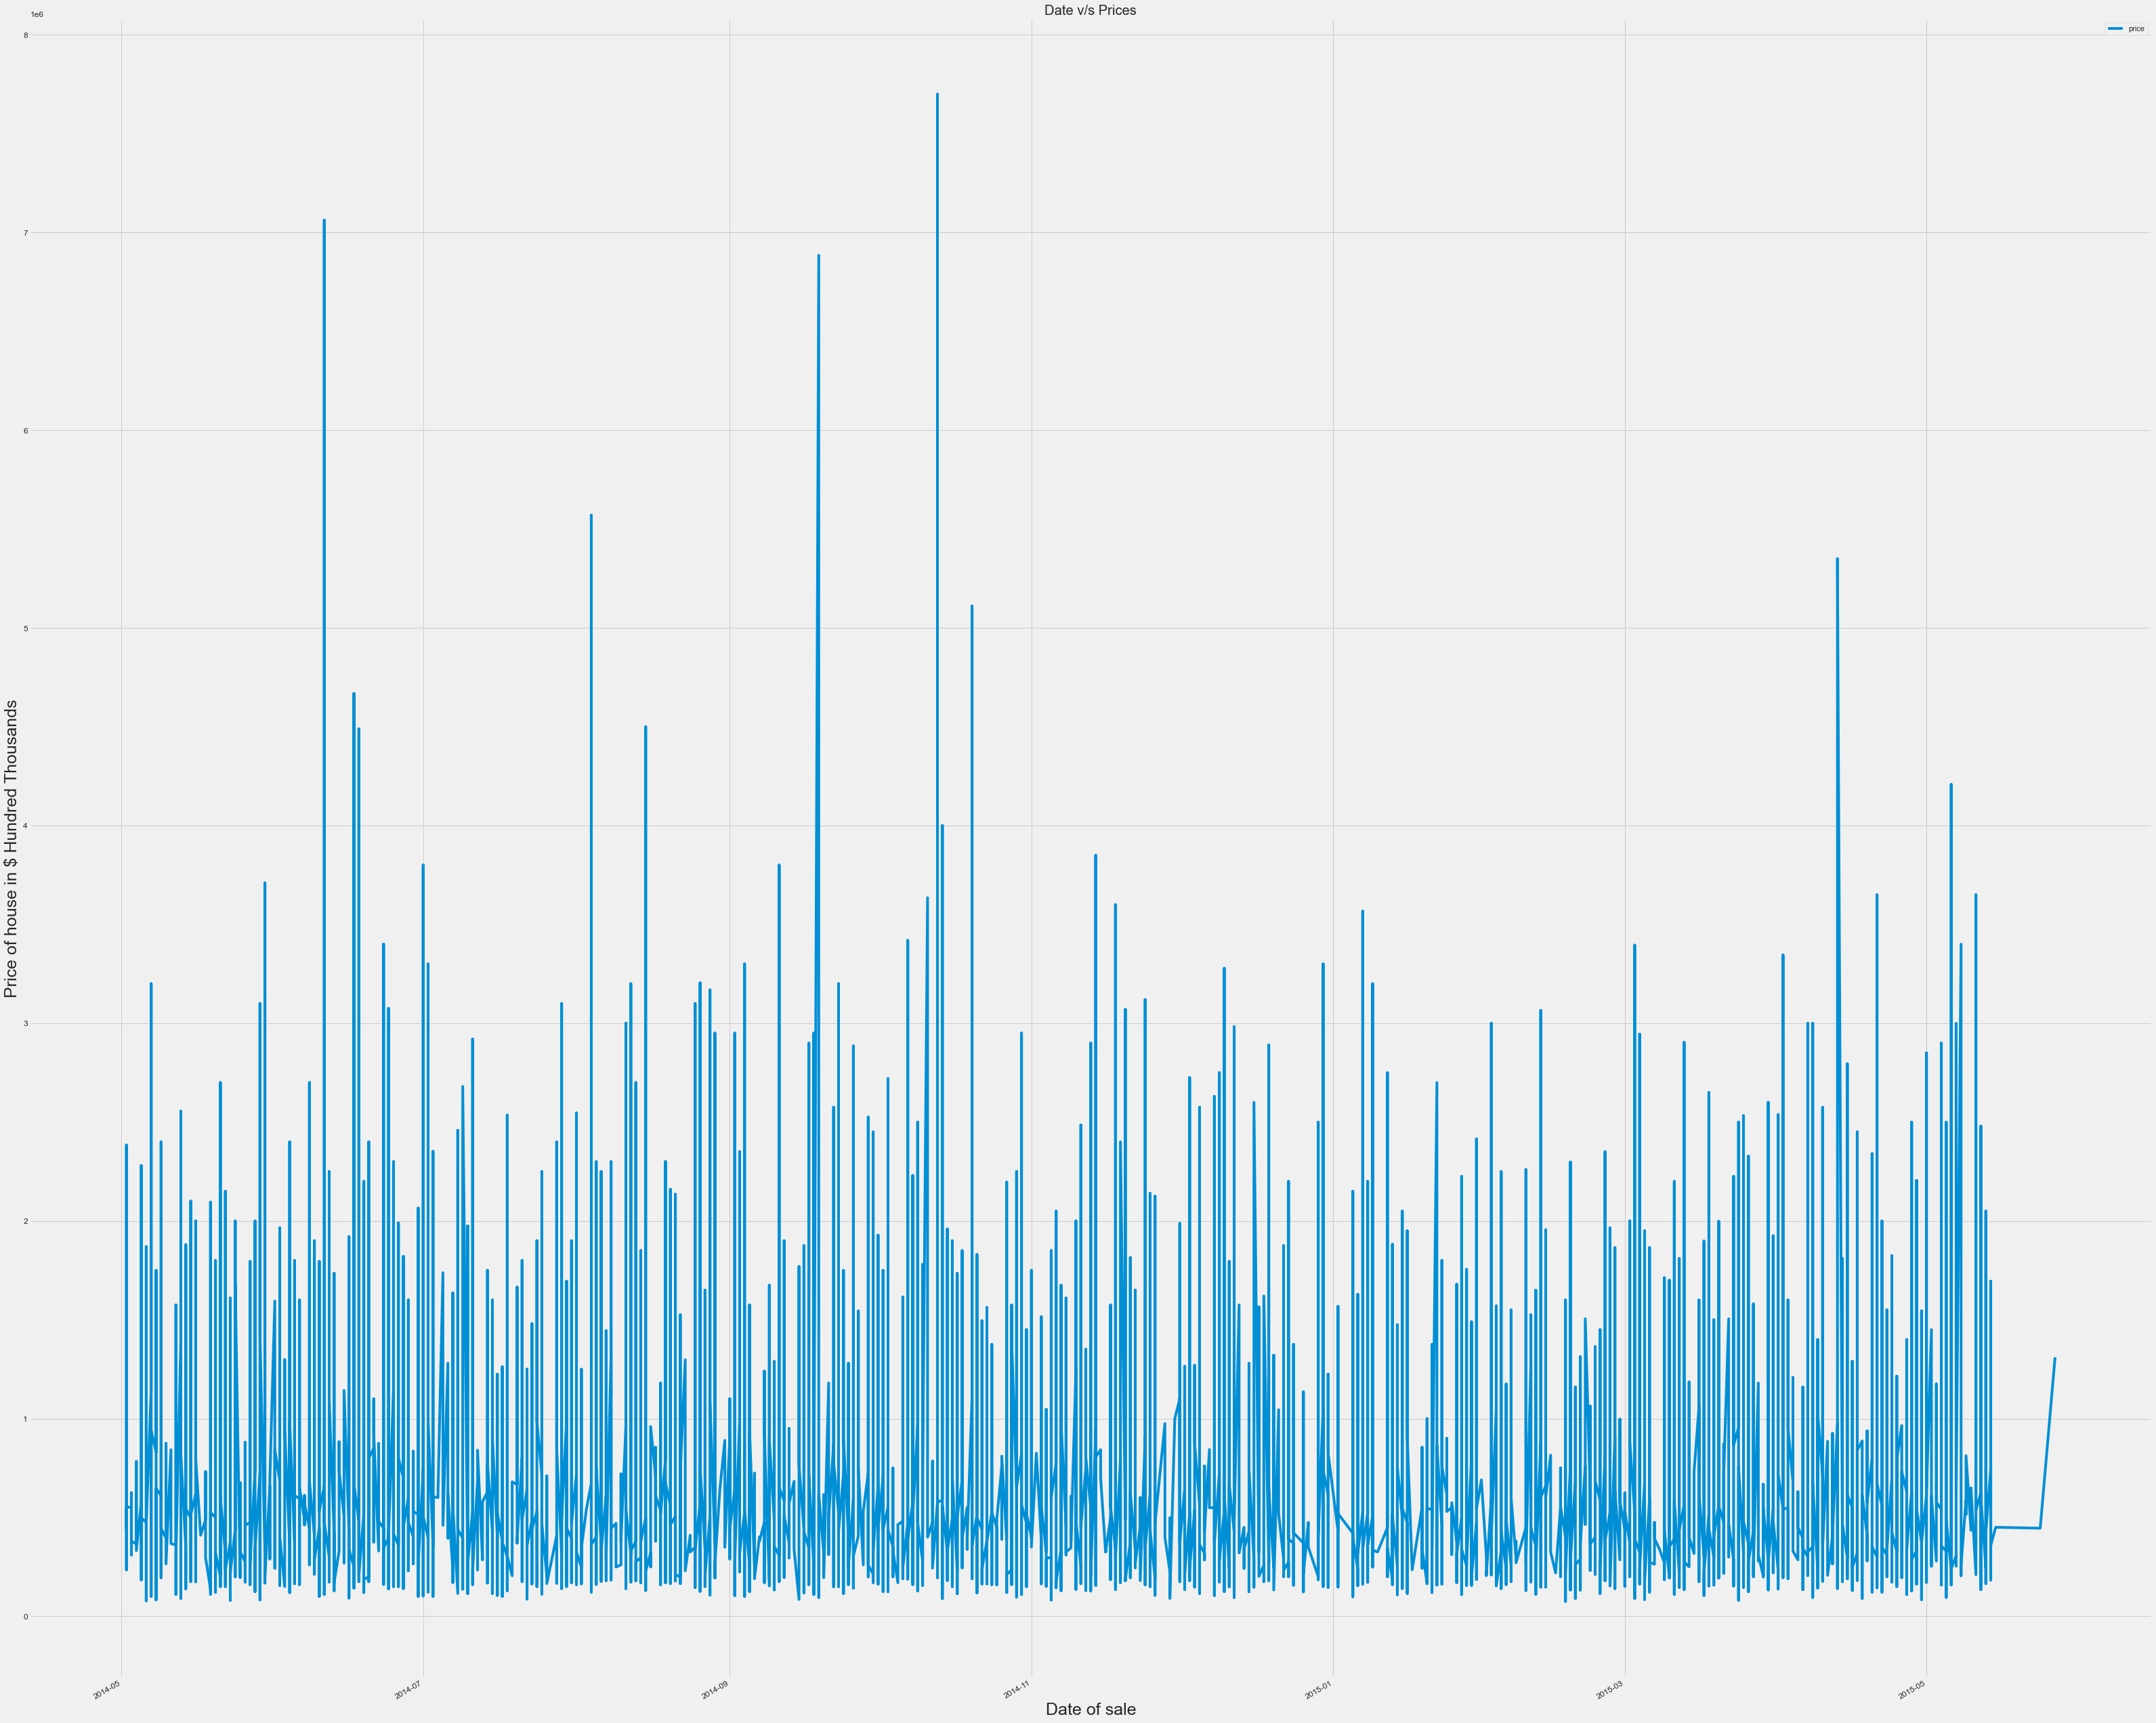

In [133]:

ax = House_Prices_Df.plot.line(x='date', y='price', title="Date v/s Prices") 
style.use('fivethirtyeight')
ax.set_ylabel("Price of house in $ Hundred Thousands")
ax.set_xlabel("Date of sale")
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels



Time series analysis on this dataset will not be useful as it only shows the data of the homes sold and for only 1 year. A detailed dataset with data about homes sold v/s unsold home over a significant period of time could display factors that can help identify what variables causes a home to be sold v/s unsold. 

***Using the statsmodel library to calculate the ANOVA***

I plan on using the independent variables who scored >0.40 in the heatmap graph for the anova one way and two way test. In this case, the dependent variable will be the price. Since the dependent variable needs to be discrete, I will divide the price column into 3 subsections. The first one <$ 3.5 Hundred Thousands, the second between $ 3.5-5.5 Hundred Thousands (also includes the mean), the last one > $ 6 Hundred Thousands

In [164]:
def sqft_divider(row):
    if row['sqft_living'] < 1000:
        return "Below_Average"
    if row['sqft_living'] >= 1000 and row['sqft_living'] < 2000:
        return "Average"
    if row['sqft_living'] >= 2000:
        return "Above Average"
House_Prices_Df["sqft_distinction"] = House_Prices_Df.apply(lambda row: sqft_divider(row), axis=1)


In [165]:
House_Prices_Df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_distinction
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Average
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Above Average
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Average
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,Average
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,Average


In [158]:
low = House_Prices_Df.loc[House_Prices_Df['sqft_living'] < 1000]
high = House_Prices_Df.loc[House_Prices_Df['sqft_living'] > 2000]

In [92]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [159]:
model = ols('sqft_living ~ price', data=House_Prices_Df).fit()
anova_results = sm.stats.anova_lm(model, type=2)
print (anova_results)

               df        sum_sq       mean_sq             F  PR(>F)
price         1.0  8.984936e+09  8.984936e+09  21001.909641     0.0
Residual  21611.0  9.245514e+09  4.278152e+05           NaN     NaN


In [160]:
model = ols('grade ~ price', data=House_Prices_Df).fit()
anova_results_2 = sm.stats.anova_lm(model, type=2)
print (anova_results_2)

               df        sum_sq       mean_sq             F  PR(>F)
price         1.0  13302.299951  13302.299951  17360.635441     0.0
Residual  21611.0  16559.071539      0.766233           NaN     NaN
